# Data Exploration

In [1]:
import os
import pydicom
import numpy as np
import pandas as pd
from ast import literal_eval

import matplotlib.pyplot as plt
from random import sample 

# Constants

In [2]:
DATA_DIR = '../data'

TRAIN_DIR = DATA_DIR + '/stage_2_train_images'

In [3]:
files_list = os.listdir(TRAIN_DIR)

# Sample Images

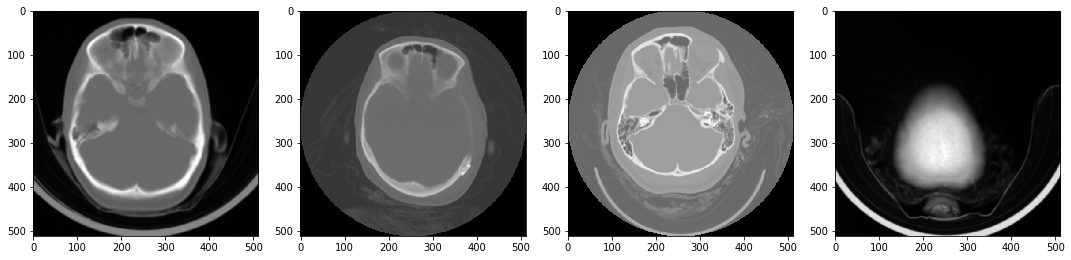

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 15))


sample_file = sample(files_list, 4)

i=0
for f in sample_file:
    
    dcm_file = pydicom.dcmread(os.path.join(TRAIN_DIR, f))
    
    axes[i].imshow(dcm_file.pixel_array, cmap='gray')
    i += 1
    
fig.tight_layout()


# Histogram

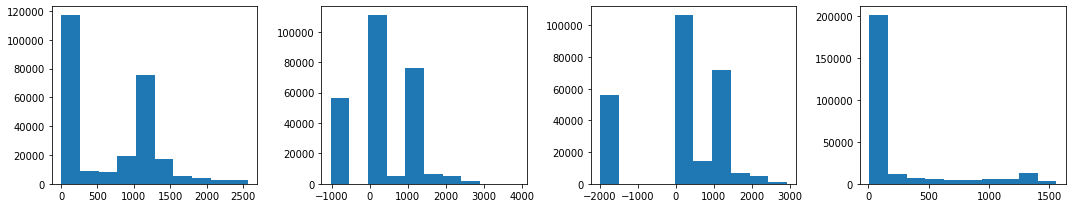

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 3))

i=0
for f in sample_file:
    
    dcm_file = pydicom.dcmread(os.path.join(TRAIN_DIR, f))
    
    axes[i].hist(dcm_file.pixel_array.flatten())
    i += 1
    
fig.tight_layout()


In [6]:
pydicom.dcmread(os.path.join(TRAIN_DIR, sample_file[0]))

(0008, 0018) SOP Instance UID                    UI: ID_3667726a4
(0008, 0060) Modality                            CS: 'CT'
(0010, 0020) Patient ID                          LO: 'ID_031cc2d3'
(0020, 000d) Study Instance UID                  UI: ID_ed190cecd7
(0020, 000e) Series Instance UID                 UI: ID_751eb2172a
(0020, 0010) Study ID                            SH: ''
(0020, 0032) Image Position (Patient)            DS: ['-102.5', '27.5', '112.699951']
(0020, 0037) Image Orientation (Patient)         DS: ['1', '0', '0', '0', '1', '0']
(0028, 0002) Samples per Pixel                   US: 1
(0028, 0004) Photometric Interpretation          CS: 'MONOCHROME2'
(0028, 0010) Rows                                US: 512
(0028, 0011) Columns                             US: 512
(0028, 0030) Pixel Spacing                       DS: ['0.400390625', '0.400390625']
(0028, 0100) Bits Allocated                      US: 16
(0028, 0101) Bits Stored                         US: 12
(0028, 0102) High

In [7]:
sample_file[0]

'ID_3667726a4.dcm'

In [8]:
pydicom.dcmread(os.path.join(TRAIN_DIR, sample_file[2]))

(0008, 0018) SOP Instance UID                    UI: ID_005fe0eb5
(0008, 0060) Modality                            CS: 'CT'
(0010, 0020) Patient ID                          LO: 'ID_1193ca2b'
(0020, 000d) Study Instance UID                  UI: ID_4430f8a5d7
(0020, 000e) Series Instance UID                 UI: ID_4b4722a9d3
(0020, 0010) Study ID                            SH: ''
(0020, 0032) Image Position (Patient)            DS: ['-125.000', '-124.524', '34.518']
(0020, 0037) Image Orientation (Patient)         DS: ['1.000000', '0.000000', '0.000000', '0.000000', '0.996195', '-0.087156']
(0028, 0002) Samples per Pixel                   US: 1
(0028, 0004) Photometric Interpretation          CS: 'MONOCHROME2'
(0028, 0010) Rows                                US: 512
(0028, 0011) Columns                             US: 512
(0028, 0030) Pixel Spacing                       DS: ['0.488281', '0.488281']
(0028, 0100) Bits Allocated                      US: 16
(0028, 0101) Bits Stored          

# Explore meta data

In [13]:
train_meta_df = pd.read_csv(DATA_DIR + '/stage_2_train_metadata.csv')

In [14]:
train_meta_df.head()

,SOP Instance UID,Patient ID,Study Instance UID,Series Instance UID,Image Orientation (Patient),Rows,Columns,Pixel Spacing,Bits Stored,High Bit,Pixel Representation,Window Center,Window Width,Rescale Intercept,Image Position x,Image Position y,Image Position z
0,ID_3bc992abb,ID_b378eaf8,ID_d0caa0266d,ID_206217224f,"['1', '0', '0', '0', '1', '0']",512,512,"['0.48828125', '0.48828125']",12,11,0,"['00036', '00036']","['00080', '00080']",-1024.0,-125.0,13.000000,-140.799995
1,ID_ad18d6bee,ID_7a824351,ID_850474f95b,ID_a6146f09d5,"['1.000000', '0.000000', '0.000000', '0.000000...",512,512,"['0.488281', '0.488281']",16,15,1,30,80,-1024.0,-117.8,-154.303000,180.803000
2,ID_f4b877a05,ID_2b4cc219,ID_3c72432f5d,ID_cf0314dad8,"['1', '0', '0', '0', '0.990268069', '-0.139173...",512,512,"['0.54296875', '0.54296875']",12,11,0,"['00040', '00040']","['00080', '00080']",-1024.0,-139.0,-29.462221,190.360202
3,ID_0031abb30,ID_ea4d2c63,ID_2fae617949,ID_3d4726fcff,"['1.000000', '0.000000', '0.000000', '0.000000...",512,512,"['0.488281', '0.488281']",16,15,1,30,80,-1024.0,-125.0,-106.103401,131.311584
4,ID_54c7c234b,ID_ccee261c,ID_cff4b7ceeb,ID_7045519467,"['1.000000', '0.000000', '0.000000', '0.000000...",512,512,"['0.488281', '0.488281']",16,15,1,40,100,-1024.0,-125.0,-104.852000,-4.262000


In [6]:
train_meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 752803 entries, 0 to 752802
Data columns (total 17 columns):
SOP Instance UID               752803 non-null object
Patient ID                     752803 non-null object
Study Instance UID             752803 non-null object
Series Instance UID            752803 non-null object
Image Orientation (Patient)    752803 non-null object
Rows                           752803 non-null int64
Columns                        752803 non-null int64
Pixel Spacing                  752803 non-null object
Bits Stored                    752803 non-null int64
High Bit                       752803 non-null int64
Pixel Representation           752803 non-null int64
Window Center                  752803 non-null object
Window Width                   752803 non-null object
Rescale Intercept              752803 non-null float64
Image Position x               752803 non-null float64
Image Position y               752803 non-null float64
Image Position z           

In [7]:
train_meta_df.Columns.value_counts()

512    752563
490        49
436        36
374        33
464        32
462        32
404        31
768        27
Name: Columns, dtype: int64

(array([6.40000e+01, 3.60000e+01, 1.13000e+02, 6.74018e+05, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.70000e+01]),
 array([374. , 413.4, 452.8, 492.2, 531.6, 571. , 610.4, 649.8, 689.2,
        728.6, 768. ]),
 <a list of 10 Patch objects>)

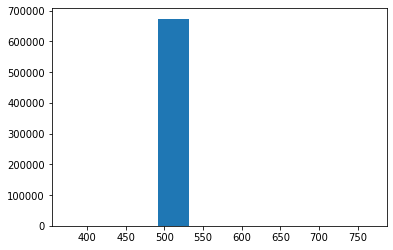

In [8]:
plt.hist(train_meta_df.Columns)

In [9]:
train_meta_df['Rescale Intercept'].value_counts()

-1024.0    662279
-1000.0      6653
 0.0         5276
 1.0           50
Name: Rescale Intercept, dtype: int64

In [10]:
train_meta_df['Study Instance UID'].value_counts()

ID_f38ff30736    60
ID_24f0f2ff02    60
ID_e7b9839958    60
ID_98fac67dfa    60
ID_cce87b8761    60
                 ..
ID_95333de792    22
ID_eb03770fb2    22
ID_d2231546d1    21
ID_36938cf4c3    20
ID_408d0cb8b7    20
Name: Study Instance UID, Length: 19530, dtype: int64

In [11]:
train_meta_df['Study Instance UID'].value_counts().describe()

count    19530.000000
mean        34.524219
std          4.993780
min         20.000000
25%         32.000000
50%         33.000000
75%         37.000000
max         60.000000
Name: Study Instance UID, dtype: float64

In [12]:
train_meta_df['Patient ID'].value_counts()

ID_268b38fe    548
ID_5e035492    384
ID_24df80e7    384
ID_39d7d875    377
ID_c7b2c196    373
              ... 
ID_7001adfb     22
ID_03ac0e28     22
ID_61fd9f22     21
ID_11e103d4     20
ID_b956c8dd     20
Name: Patient ID, Length: 17079, dtype: int64

In [15]:
train_meta_df['Image Position z'] = train_meta_df['Image Position z'].astype('float')
df_sorted = train_meta_df.sort_values(by=['Study Instance UID', 'Image Position z'])

In [16]:
df_sorted['Order'] = df_sorted.groupby('Study Instance UID')['Image Position z'].rank(method='min')
df_sorted['Distance'] = df_sorted['Image Position z'].diff()


df_sorted.loc[df_sorted.Order  == 1, 'Distance'] = None

In [17]:
df_sorted.head(50)

,SOP Instance UID,Patient ID,Study Instance UID,Series Instance UID,Image Orientation (Patient),Rows,Columns,Pixel Spacing,Bits Stored,High Bit,Pixel Representation,Window Center,Window Width,Rescale Intercept,Image Position x,Image Position y,Image Position z,Order,Distance
59506,ID_a7ebd9a36,ID_c19f5cf3,ID_000421322f,ID_9564051003,"['1.000000', '0.000000', '0.000000', '0.000000...",512,512,"['0.488281', '0.488281']",16,15,1,30,80,-1024.0,-125.0,-105.49800,13.124000,1.0,NaN
81427,ID_104ca91e0,ID_c19f5cf3,ID_000421322f,ID_9564051003,"['1.000000', '0.000000', '0.000000', '0.000000...",512,512,"['0.488281', '0.488281']",16,15,1,30,80,-1024.0,-125.0,-105.49800,18.517000,2.0,5.393000
551,ID_444028fda,ID_c19f5cf3,ID_000421322f,ID_9564051003,"['1.000000', '0.000000', '0.000000', '0.000000...",512,512,"['0.488281', '0.488281']",16,15,1,30,80,-1024.0,-125.0,-105.49800,23.909000,3.0,5.392000
90240,ID_3560df5fd,ID_c19f5cf3,ID_000421322f,ID_9564051003,"['1.000000', '0.000000', '0.000000', '0.000000...",512,512,"['0.488281', '0.488281']",16,15,1,30,80,-1024.0,-125.0,-105.49800,29.302000,4.0,5.393000
78714,ID_c143b5d4d,ID_c19f5cf3,ID_000421322f,ID_9564051003,"['1.000000', '0.000000', '0.000000', '0.000000...",512,512,"['0.488281', '0.488281']",16,15,1,30,80,-1024.0,-125.0,-105.49800,34.694000,5.0,5.392000
88121,ID_d8aac7719,ID_c19f5cf3,ID_000421322f,ID_9564051003,"['1.000000', '0.000000', '0.000000', '0.000000...",512,512,"['0.488281', '0.488281']",16,15,1,30,80,-1024.0,-125.0,-105.49800,40.087000,6.0,5.393000
110575,ID_30e30b7c8,ID_c19f5cf3,ID_000421322f,ID_9564051003,"['1.000000', '0.000000', '0.000000', '0.000000...",512,512,"['0.488281', '0.488281']",16,15,1,30,80,-1024.0,-125.0,-105.49800,45.479000,7.0,5.392000
47379,ID_fbca080c3,ID_c19f5cf3,ID_000421322f,ID_9564051003,"['1.000000', '0.000000', '0.000000', '0.000000...",512,512,"['0.488281', '0.488281']",16,15,1,30,80,-1024.0,-125.0,-105.49800,50.872000,8.0,5.393000
96536,ID_df9aa1104,ID_c19f5cf3,ID_000421322f,ID_9564051003,"['1.000000', '0.000000', '0.000000', '0.000000...",512,512,"['0.488281', '0.488281']",16,15,1,30,80,-1024.0,-125.0,-105.49800,56.264000,9.0,5.392000
82197,ID_c9afefa2c,ID_c19f5cf3,ID_000421322f,ID_9564051003,"['1.000000', '0.000000', '0.000000', '0.000000...",512,512,"['0.488281', '0.488281']",16,15,1,30,80,-1024.0,-125.0,-105.49800,61.657000,10.0,5.393000


In [15]:
df_sorted['Image Position z'].describe()

count    674258.000000
mean        174.155414
std         256.263930
min        -998.400024
25%          68.485893
50%         126.874794
75%         191.645589
max        1794.012760
Name: Image Position z, dtype: float64

In [16]:
df_sorted.groupby('Study Instance UID').Distance.mean()

Study Instance UID
ID_00047d6503    3.974359
ID_0004f7a877    6.000000
ID_0006600dd8    4.300309
ID_000b852931    5.000000
ID_00135fb9ff    5.000000
                   ...   
ID_fff42eecc1    5.000000
ID_fff953861b    5.000000
ID_fffc71b58c    5.000000
ID_fffcf310dc    5.176484
ID_fffdba8d7b    5.000000
Name: Distance, Length: 19530, dtype: float64

In [17]:
df_sorted.groupby('Study Instance UID').Distance.nunique()

Study Instance UID
ID_00047d6503     7
ID_0004f7a877     2
ID_0006600dd8    19
ID_000b852931     1
ID_00135fb9ff     3
                 ..
ID_fff42eecc1     3
ID_fff953861b     3
ID_fffc71b58c     7
ID_fffcf310dc    14
ID_fffdba8d7b     1
Name: Distance, Length: 19530, dtype: int64

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([6.08550e+04, 5.93778e+05, 3.10000e+01, 8.00000e+00, 4.00000e+00,
        3.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([ 0.       ,  3.7748016,  7.5496032, 11.3244048, 15.0992064,
        18.874008 , 22.6488096, 26.4236112, 30.1984128, 33.9732144,
        37.748016 ]),
 <a list of 10 Patch objects>)

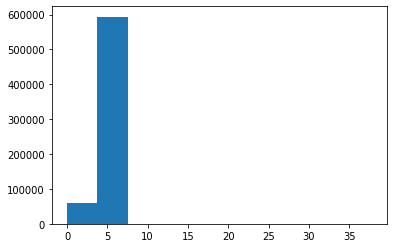

In [18]:
plt.hist(df_sorted.Distance)

In [18]:
df_clean = df_sorted[['SOP Instance UID', 'Study Instance UID', 'Image Position x', 
                      'Image Position y', 'Image Position z', 'Order', 'Distance']].reset_index(drop=True)

In [19]:
df_clean.head(50)

,SOP Instance UID,Study Instance UID,Image Position x,Image Position y,Image Position z,Order,Distance
0,ID_a7ebd9a36,ID_000421322f,-125.0,-105.49800,13.124000,1.0,NaN
1,ID_104ca91e0,ID_000421322f,-125.0,-105.49800,18.517000,2.0,5.393000
2,ID_444028fda,ID_000421322f,-125.0,-105.49800,23.909000,3.0,5.392000
3,ID_3560df5fd,ID_000421322f,-125.0,-105.49800,29.302000,4.0,5.393000
4,ID_c143b5d4d,ID_000421322f,-125.0,-105.49800,34.694000,5.0,5.392000
5,ID_d8aac7719,ID_000421322f,-125.0,-105.49800,40.087000,6.0,5.393000
6,ID_30e30b7c8,ID_000421322f,-125.0,-105.49800,45.479000,7.0,5.392000
7,ID_fbca080c3,ID_000421322f,-125.0,-105.49800,50.872000,8.0,5.393000
8,ID_df9aa1104,ID_000421322f,-125.0,-105.49800,56.264000,9.0,5.392000
9,ID_c9afefa2c,ID_000421322f,-125.0,-105.49800,61.657000,10.0,5.393000


In [20]:
df_clean.to_csv(DATA_DIR + '/stage_2_train_ordered.csv', index=False)